<a href="https://colab.research.google.com/github/SahilBharodiya/Machine_Learning_without_frameworks_in_python/blob/main/Linear_Regression_Multi_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries for basic calculations

In [ ]:
import numpy as np  # For array related work
import pandas as pd  # For reading csv files
from math import sqrt  # For error analysis
import matplotlib.pyplot as plt  # For plotting curves

### Reading data CSV files

In [ ]:
data = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Real estate.csv")).dropna()
data = data.drop(columns=['No', 'X1 transaction date'])

#### Removing unneccessary data

In [ ]:
X = data.drop(columns=['Y house price of unit area'])
y = data['Y house price of unit area']

In [ ]:
X = np.array(X)
y = np.array(y)

### Normalising data

## $x = \frac{x - mean}{max(X) - min(X)}$

In [ ]:
def mean(x):
    return sum(x) / len(x)

def Range(x):
    return abs(max(x) - min(x))

In [ ]:
mean_X = [mean(X[:, i]) for i in range(5)]
mean_y = mean(y)

Range_X = [Range(X[:, i]) for i in range(5)]
Range_y = Range(y)

In [ ]:
for i in range(5):
    for j in range(len(X)):
        X[j, i] = (X[j, i] - mean_X[i]) / Range_X[i]
for i in range(len(y)):
    y[i] = (y[i] - mean_y) / Range_y

### Converting data into matrix

In [ ]:
X = np.matrix(X)
y = np.matrix(y).T

#### Random initialising of $\theta$,  $\triangle\theta$ and setting $\alpha$ ( learning rate )

In [ ]:
theta = np.matrix(np.array([0, 0, 0, 0, 0])).T
change_theta = np.matrix(np.array([1, 1, 1, 1, 1])).T
alpha = 0.1
m = len(X)
c = alpha / m

### Applying Gradient Descent

In [ ]:
iter = 0
while True:
    if change_theta.max() < 0.00000000001:
        break
    else:
        temp_theta = theta
        theta = theta - c * X.T * (X * theta - y)
        change_theta = abs(theta - temp_theta)
        iter += 1
        print(iter, "\n", theta)

### RMSE calculation

### $RMSE = \sqrt\frac {\sum_{i=0} ^ {m} (\bar{y}_i - y_i)} {m}$

In [ ]:
error = 0
for i in range(len(X)):
    error += (X[i] * theta - y[i]) ** 2
error = sqrt(error / m)
error = "%0.2f" % error
print("RMSE =", error)

RMSE = 0.08


### Prediction

In [ ]:
prediction = X * theta

### Plotting Curve

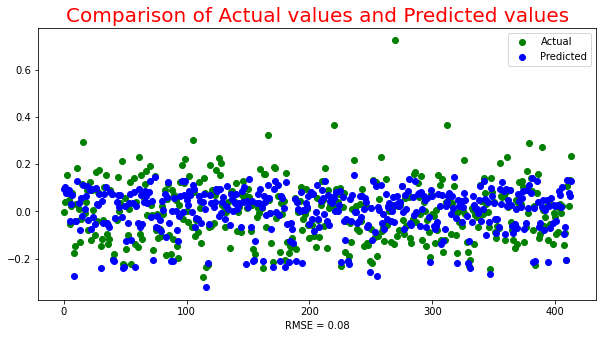

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Comparison of Actual values and Predicted values", color='red', size=20)
plt.xlabel(f'RMSE = {error}')
plt.scatter([i for i in range(m)], np.array(y), label='Actual', color='green')
plt.scatter([i for i in range(m)], np.array(prediction), label='Predicted', color='blue')
plt.legend()
plt.show()

### This is Shortcut for finding optimal value of $\theta$

$\theta = (X^TX)^{-1}Xy$

##### *But if number of samples is greater then 10,000 then don't use it, go for above procedure

In [ ]:
actual_theta = (X.T * X).I * X.T * y
actual_theta

matrix([[-0.10717523],
        [-0.25053202],
        [ 0.10582534],
        [ 0.17853092],
        [-0.00658669]])

##### Derivation of Gradient Descent is in [this pdf](https://drive.google.com/file/d/1pCGHkHYa0pJH5q3C_hOTKNvGxzWzJ-3X/view?usp=sharing)